In [2]:
%pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install yfinance



  Using cached yfinance-0.2.40-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached lxml-5.2.2-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
  Using cached frozendict-2.4.4-py312-none-any.whl.metadata (23 kB)
  Using cached peewee-3.17.5.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached soupsieve-2.5-py3-none-any.whl.metadata (4.7 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached yfinance-0.2.40-py2.py3-none-any.whl (73 kB)
Using cached b

[*********************100%%**********************]  1 of 1 completed


In [39]:
import yfinance as yf
import pandas as pd


# Define the ticker symbol for S&P 500
ticker_symbol = "ES=F"

# Get data
sp500futures_data = yf.download(ticker_symbol, start="2023-06-17", end="2024-06-17")

# Save data to CSV
sp500futures_data.to_csv("sp500_data.csv")

#import cv to dataframe
spfutures_df = pd.read_csv('sp500_data.csv')

[*********************100%%**********************]  1 of 1 completed


In [40]:
spfutures_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-20,4458.00,4462.00,4410.50,4434.75,4434.75,1540416
1,2023-06-21,4430.25,4438.50,4403.50,4409.25,4409.25,1468258
2,2023-06-22,4410.00,4427.00,4393.00,4423.75,4423.75,1384002
3,2023-06-23,4425.75,4426.25,4381.50,4389.00,4389.00,1550992
4,2023-06-26,4390.00,4403.00,4368.50,4370.25,4370.25,1622416
...,...,...,...,...,...,...,...
246,2024-06-10,5351.50,5375.75,5338.25,5371.25,5371.25,1185881
247,2024-06-11,5369.75,5386.25,5334.50,5384.00,5384.00,1413433
248,2024-06-12,5384.50,5454.50,5380.00,5427.50,5427.50,1899786
249,2024-06-13,5436.25,5452.75,5408.50,5438.50,5438.50,1682858


In [41]:
len(spfutures_df)/1000

0.251

In [43]:
import numpy as np
def create_tick_bars(df, tick_size):
    # Calculate the number of bars we can create
    num_bars = int(np.floor(len(df) / tick_size))
    
    # Create tick bars
    tick_bars = []
    for i in range(num_bars):
        bar = df.iloc[i * tick_size:(i + 1) * tick_size]
        tick_bars.append({
            'Open': bar['Open'].iloc[0],
            'High': bar['High'].max(),
            'Low': bar['Low'].min(),
            'Close': bar['Close'].iloc[-1],
            'Volume': bar['Volume'].sum()
        })
        
    return pd.DataFrame(tick_bars)

# Define tick size (number of ticks per bar)
tick_size = 10

# Create tick bars DataFrame
tick_bars_df = create_tick_bars(spfutures_df, tick_size)

tick_bars_df

,Open,High,Low,Close,Volume
0,4458.00,4498.00,4368.50,4492.25,14812780
1,4492.00,4594.50,4411.25,4587.75,14011293
2,4582.75,4634.50,4553.75,4601.25,14305174
3,4580.00,4593.50,4447.00,4454.00,16968727
4,4453.25,4509.50,4350.00,4506.75,15268007
5,4508.75,4547.75,4434.25,4468.75,14049598
6,4471.75,4517.75,4277.00,4313.50,15361956
7,4323.25,4419.75,4235.50,4409.75,18968785
8,4417.75,4430.50,4203.75,4209.75,20684073
9,4202.00,4407.75,4122.25,4399.50,18116647


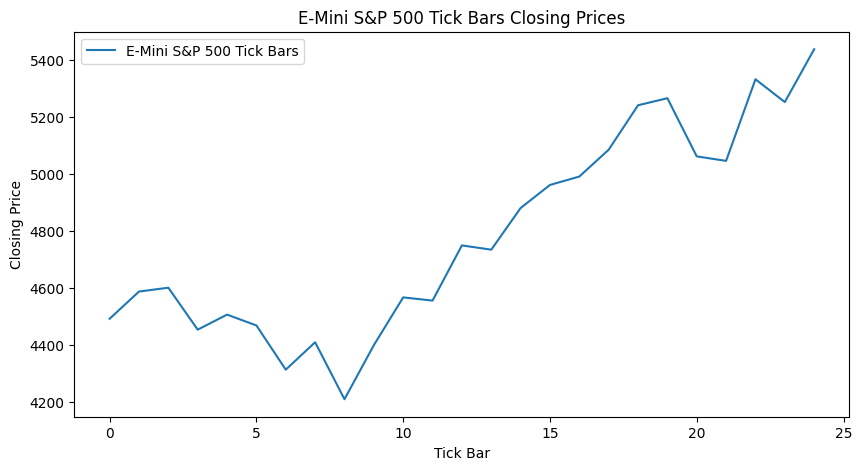

In [44]:
# Plot the tick bars closing price data
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(tick_bars_df.index, tick_bars_df['Close'], label='E-Mini S&P 500 Tick Bars')

# Add labels and title
plt.xlabel('Tick Bar')
plt.ylabel('Closing Price')
plt.title('E-Mini S&P 500 Tick Bars Closing Prices')
plt.legend()

# Show the plot
plt.show()


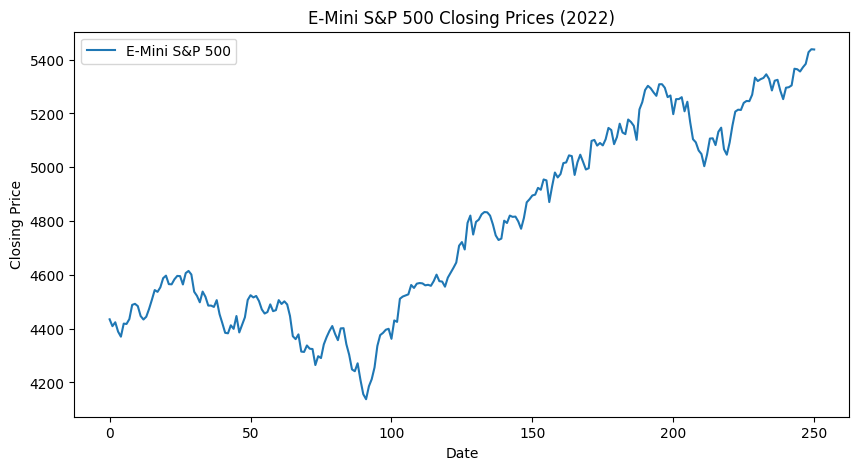

In [45]:
#time bar
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the closing price data
plt.figure(figsize=(10, 5))
plt.plot(spfutures_df.index, spfutures_df['Close'], label='E-Mini S&P 500')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('E-Mini S&P 500 Closing Prices (2022)')
plt.legend()

# Show the plot
plt.show()


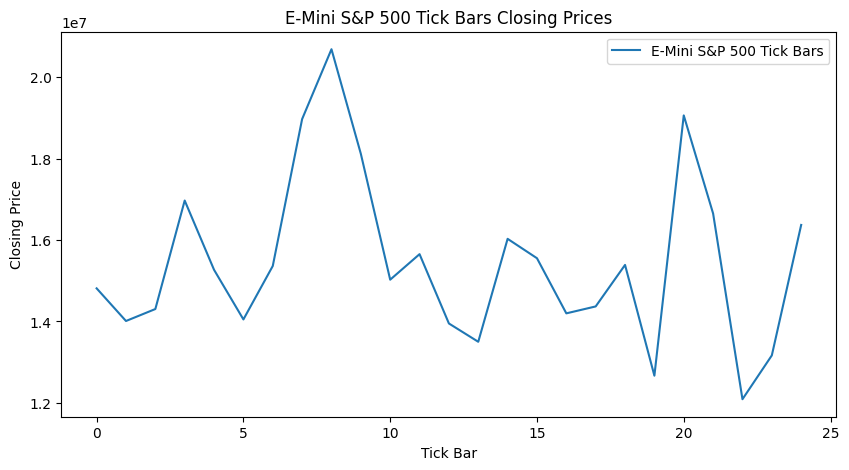

In [46]:
# Plot the volume bars closing price data
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(tick_bars_df.index, tick_bars_df['Volume'], label='E-Mini S&P 500 Tick Bars')

# Add labels and title
plt.xlabel('Tick Bar')
plt.ylabel('Closing Price')
plt.title('E-Mini S&P 500 Tick Bars Closing Prices')
plt.legend()

# Show the plot
plt.show()


Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


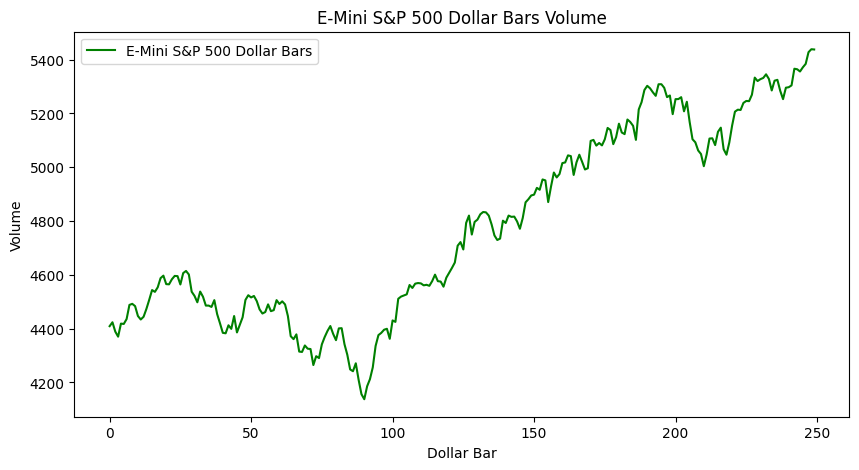

In [55]:
def create_dollar_bars(df, dollar_size):
    dollar_bars = []
    cumulative_dollar = df['Close'].cumsum()
    dollar_bar_indices = cumulative_dollar[cumulative_dollar.diff() >= dollar_size].index

    dollar_bars = df.loc[dollar_bar_indices]

    if dollar_bar_indices[-1] != df.index[-1]:
        dollar_bars = pd.concat([dollar_bars,df.iloc[[-1]]])

    dollar_bars.reset_index(inplace=True)

    return pd.DataFrame(dollar_bars)

# Define dollar size (total dollar amount traded per bar)
dollar_size = 1000  # Adjust this value based on your data and requirements

# Create dollar bars DataFrame
dollar_bars_df = create_dollar_bars(spfutures_df, dollar_size)

# Check the columns of dollar_bars_df
print(dollar_bars_df.columns)

# Plot the dollar bars volume data
plt.figure(figsize=(10, 5))
plt.plot(dollar_bars_df.index, dollar_bars_df['Close'], label='E-Mini S&P 500 Dollar Bars', color='green')

# Add labels and title
plt.xlabel('Dollar Bar')
plt.ylabel('Volume')
plt.title('E-Mini S&P 500 Dollar Bars Volume')
plt.legend()

# Show the plot
plt.show()

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


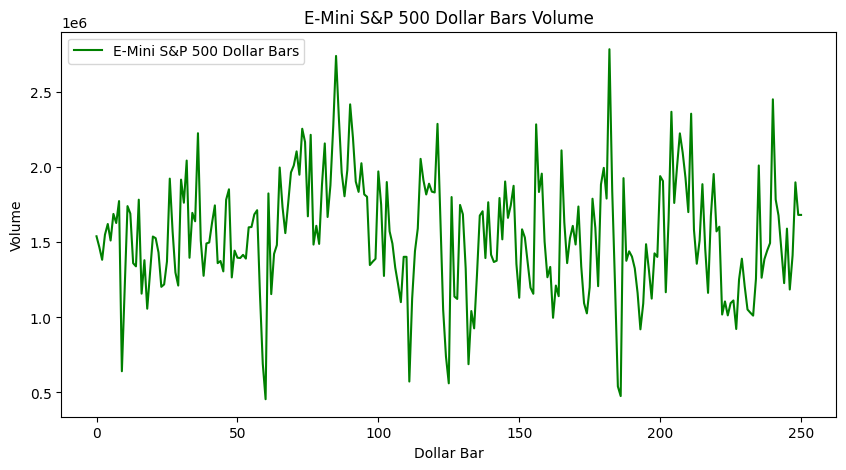

In [54]:
def create_dollar_bars(df, dollar_size):
    dollar_bars = []
    cumulative_dollar = 0
    bar_data = {'Open': None, 'High': float('-inf'), 'Low': float('inf'), 'Close': None, 'Volume': 0}

    for index, row in df.iterrows():
        trade_dollar = row['Close'] * row['Volume']
        cumulative_dollar += trade_dollar

        if bar_data['Open'] is None:
            bar_data['Open'] = row['Open']
        bar_data['High'] = max(bar_data['High'], row['High'])
        bar_data['Low'] = min(bar_data['Low'], row['Low'])
        bar_data['Close'] = row['Close']
        bar_data['Volume'] += row['Volume']

        if cumulative_dollar >= dollar_size:
            dollar_bars.append(bar_data.copy())
            cumulative_dollar = 0
            bar_data = {'Open': None, 'High': float('-inf'), 'Low': float('inf'), 'Close': None, 'Volume': 0}

    return pd.DataFrame(dollar_bars)

# Define dollar size (total dollar amount traded per bar)
dollar_size = 1e7  # Adjust this value based on your data and requirements

# Create dollar bars DataFrame
dollar_bars_df = create_dollar_bars(spfutures_df, dollar_size)

# Check the columns of dollar_bars_df
print(dollar_bars_df.columns)

# Plot the dollar bars volume data
plt.figure(figsize=(10, 5))
plt.plot(dollar_bars_df.index, dollar_bars_df['Volume'], label='E-Mini S&P 500 Dollar Bars', color='green')

# Add labels and title
plt.xlabel('Dollar Bar')
plt.ylabel('Volume')
plt.title('E-Mini S&P 500 Dollar Bars Volume')
plt.legend()

# Show the plot

In [68]:
# Compute serial correlation for 'Close' prices
tick_serial_corr_close = tick_bars_df['Close'].autocorr()

vol_serial_corr_close = tick_bars_df['Volume'].autocorr()


serial_corr_close = dollar_bars_df['Close'].autocorr()

# Compute serial correlation for 'Volume'
serial_corr_volume = dollar_bars_df['Volume'].autocorr()

print(f"Serial correlation for dollar Close prices: {serial_corr_close}")
print(f"Serial correlation for dollar Volume: {serial_corr_volume}")
print(f"Serial correlation for tick bar: {tick_serial_corr_close}")
print(f"Serial correlation for Volume bar: {vol_serial_corr_close}")


Serial correlation for dollar Close prices: 0.9952748432786686
Serial correlation for dollar Volume: 0.4819374613235937
Serial correlation for tick bar: 0.9310365453312307
Serial correlation for Volume bar: 0.2968404569526603


In [72]:
#implemeting jacque-bera 
from scipy.stats import jarque_bera
#tick bar

tickjb_test_statistic, tickjb_p_value = jarque_bera(tick_bars_df['Close'])

#vol bar
voljb_test_statistic, voljb_p_value = jarque_bera(tick_bars_df['Volume'])


#dollar bar

dolljb_test_statistic, dolljb_p_value = jarque_bera(dollar_bars_df['Volume'])

print(f"tick jb test statistic: {tickjb_test_statistic}")
print(f"tick jb p value: {tickjb_p_value}")
print(f"vol jb test statistic: {voljb_test_statistic}")
print(f"vol jb p value: {voljb_p_value}")
print(f"doll jb test statistic: {dolljb_test_statistic}")
print(f"doll jb p value: {dolljb_p_value}")

tick jb test statistic: 1.82608879267246
tick jb p value: 0.40130064423671646
vol jb test statistic: 2.621357804731628
vol jb p value: 0.2696369370771622
doll jb test statistic: 2.0778436377353757
doll jb p value: 0.3538359756428866


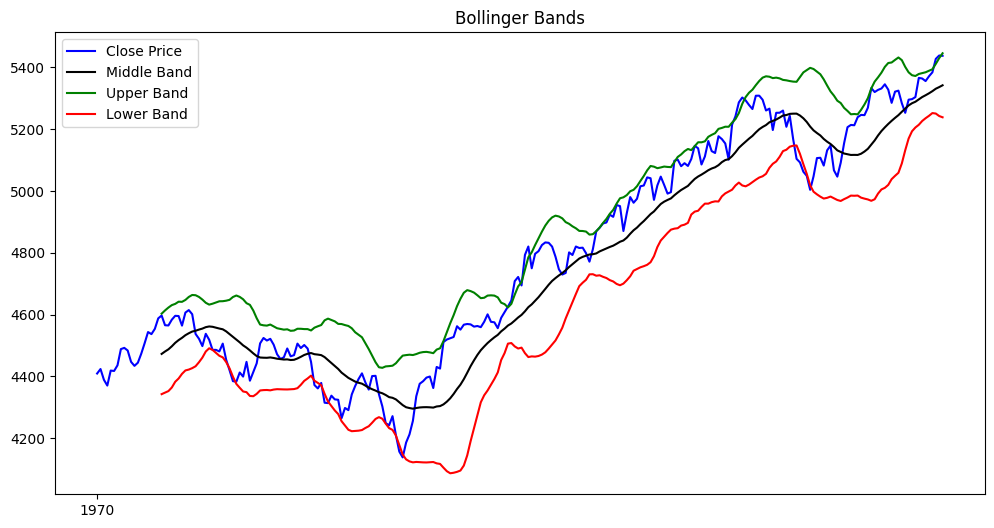

In [73]:
#bollinger bands
dollar_bars_df['Middle Band'] = dollar_bars_df['Close'].rolling(window=20).mean()
dollar_bars_df['Upper Band'] = dollar_bars_df['Middle Band'] + 2 * dollar_bars_df['Close'].rolling(window=20).std()
dollar_bars_df['Lower Band'] = dollar_bars_df['Middle Band'] - 2 * dollar_bars_df['Close'].rolling(window=20).std()

# Plotting the data along with Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(dollar_bars_df['Close'], label='Close Price', color = 'blue')
plt.plot(dollar_bars_df['Middle Band'], label='Middle Band', color = 'black')
plt.plot(dollar_bars_df['Upper Band'], label='Upper Band', color = 'green')
plt.plot(dollar_bars_df['Lower Band'], label='Lower Band', color = 'red')
plt.title('Bollinger Bands')
plt.legend()
plt.show()